# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
datafile = "C:/Users/GAURAV/Desktop/Final Ex2/F_ex2/ex2data1.txt"


data = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data


In [3]:
#features
x = np.transpose(np.array(data[:-1]))


In [4]:
#target
y = np.transpose(np.array(data[-1:]))


In [5]:
#sample Size
m = y.size
print('Size of sample is:',m)

Size of sample is: 100


In [6]:
#adding Feature X0
x = np.insert(x,0,1, axis=1)


In [7]:
#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([x[i] for i in range(x.shape[0]) if y[i]==1])
neg = np.array([x[i] for i in range(x.shape[0]) if y[i]==0])



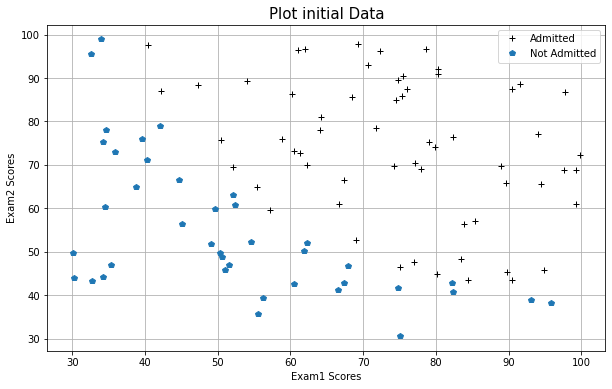

In [8]:
#plotting Data

def plotdata():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,1],pos[:,2],'k+',label ='Admitted')
    plt.plot(neg[:,1],neg[:,2],'p', label = 'Not Admitted')
    plt.xlabel('Exam1 Scores')
    plt.ylabel('Exam2 Scores')
    plt.title('Plot initial Data', fontsize =15)
    plt.legend()
    plt.grid(True)

plotdata()

In [9]:
from scipy.special import expit #Vectorized sigmoid function

**This Expit is nothing but LOGISTIC SIGMOID FUNCTION**

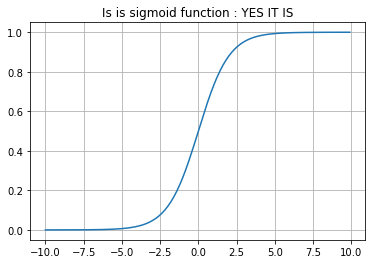

In [10]:
myx = np.arange(-10,10,.1)
plt.plot(myx,expit(myx))
plt.title('Is is sigmoid function : YES IT IS', fontsize = 12)
plt.grid(True)

In [11]:
#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

In [12]:
#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, if you set mylambda to nonzero
    For the first part of the homework, the default 0. is used for mylambda
    """
    #note to self: *.shape is (rows, columns)
    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [13]:
#Check that with theta as zeros, cost returns about 0.693:
initial_theta = np.zeros((x.shape[1],1)) #number of columns in x = number of rows in theta
round(computeCost(initial_theta,x,y),3)

0.693

In [14]:
#An alternative to OCTAVE's 'fminunc' we'll use some scipy.optimize function, "fmin"
#Note "fmin" does not need to be told explicitly the derivative terms
#It only needs the cost function, and it minimizes with the "downhill simplex algorithm."

from scipy import optimize

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]

http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html

**Use above link for reference**

In [15]:
theta, mincost = optimizeTheta(initial_theta,x,y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [16]:
computeCost(theta,x,y)

0.2034977015902151

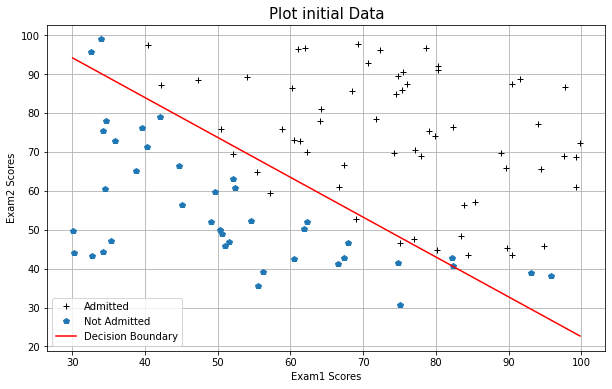

In [18]:
#Plotting the decision boundary: two points, draw a line between
#Decision boundary occurs when h = 0, or when
#theta0 + theta1*x1 + theta2*x2 = 0
#y=mx+b is replaced by x2 = (-1/thetheta2)(theta0 + theta1*x1)

point_x = np.array([np.min(x[:,1]), np.max(x[:,1])])
point_y = (-1./theta[2])*(theta[0] + theta[1]*point_x)
plotdata()
plt.plot(point_x,point_y,'r-',label='Decision Boundary')
plt.legend()

In [19]:
#let's say we are having student1 with marks as 85 and 72 in exam1 and exam2
#find the probabilty of his admission

#let's say we are having student2 with marks as 70 and 62 in exam1 and exam2
#find the probabilty of his admission

per1 = h(theta,np.array([1,85,72]))
per2 = h(theta,np.array([1,70,62]))

print('Probability that this student_1 will get admission is',round((per1*100),2),'%')
print('Probability that this student_2 will get admission is',round((per2*100),2),'%')

Probability that this student_1 will get admission is 99.9 %
Probability that this student_2 will get admission is 85.4 %


# Regularized Logistic Regression

In [20]:
datafile = "C:/Users/GAURAV/Desktop/Final Ex2/F_ex2/ex2data2.txt"

In [21]:
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
##Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
##Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

In [23]:
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

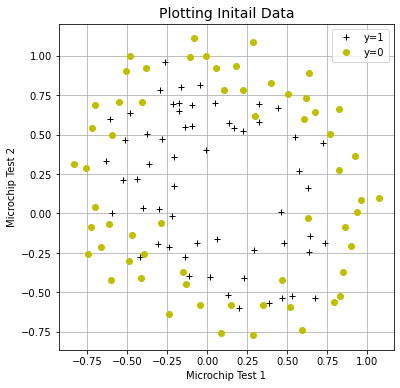

In [36]:
def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.title('Plotting Initail Data', fontsize = 14)
    plt.legend()
    plt.grid(True)

#Draw it square to emphasize circular features
plt.figure(figsize=(6,6))
plotData()

In [37]:
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [38]:
mappedX = mapFeature(X[:,1],X[:,2])

In [39]:
#Cost function is the same as the one implemented above, as I included the regularization
#toggled off for default function call (lambda = 0)
#I do not need separate implementation of the derivative term of the cost function
#Because the scipy optimization function I'm using only needs the cost function itself
#Let's check that the cost function returns a cost of 0.693 with zeros for initial theta,
#and regularized x values
initial_theta = np.zeros((mappedX.shape[1],1))
computeCost(initial_theta,mappedX,y)

0.6931471805599453

In [40]:
#I noticed that fmin wasn't converging (passing max # of iterations)
#so let's use minimize instead

def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta,mappedX,y)

In [41]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

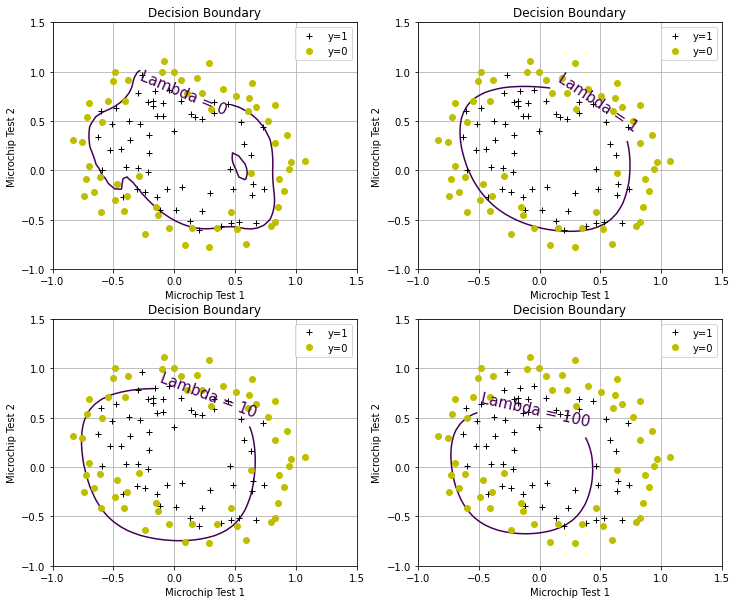

In [42]:
#Build a figure showing contours for various values of regularization parameter, lambda
#It shows for lambda=0 we are overfitting, and for lambda=100 we are underfitting
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData()
plotBoundary(theta,mappedX,y,0.)

plt.subplot(222)
plotData()
plotBoundary(theta,mappedX,y,1.)

plt.subplot(223)
plotData()
plotBoundary(theta,mappedX,y,10.)

plt.subplot(224)
plotData()
plotBoundary(theta,mappedX,y,100.)